In [1]:
%load_ext autoreload
%autoreload 1

import jax.numpy as jnp
from jax import random, jit, vmap, random
rng = random.PRNGKey(1995)

In [3]:
from flow_matching_jax.train import create_train_state, restore_checkpoint
from flax.training import orbax_utils
import orbax
import os

2025-03-26 14:43:36.499795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743000216.508739  124455 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743000216.512873  124455 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.3.0) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_min

In [4]:
import flow_matching_jax.configs.fashion_mnist as config_module

workdir = f"/home/ubuntu/WashingtonMain/conditioning-diffusions/flow_matching_jax/workdir/fashion_mnist"
#make workdir absolute
# workdir = os.path.abspath(workdir)

orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()
options = orbax.checkpoint.CheckpointManagerOptions(max_to_keep=2, create=True)
checkpoint_manager = orbax.checkpoint.CheckpointManager(
    workdir, orbax_checkpointer, options)

config = config_module.get_config()
state = create_train_state(rng, config)
state = restore_checkpoint(state, checkpoint_manager)

initializing


In [ ]:
%autoreload 1
from flow_matching_jax.flow_matching_sampling import sample, get_input_shape

ModuleNotFoundError: No module named 'flow_matching_sampling'

In [ ]:
input_shape = get_input_shape(config)
time_steps = 100

samples = sample(rng, state, train_config, input_shape, full_path=True, N_samples=4)

Using 100 timesteps


<Figure size 1440x1440 with 0 Axes>

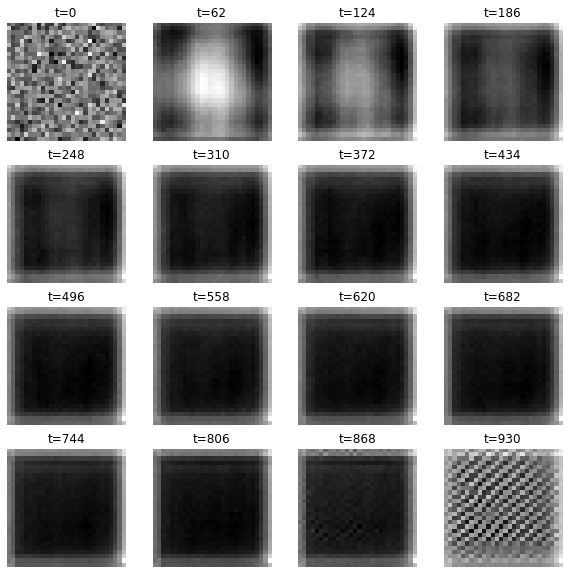

In [6]:
from matplotlib import pyplot as plt
# make a grid of 16 images
plt.figure(figsize=(20, 20))
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

n_plots = 16

for i in range(4):
    for j in range(4):
        index = time_steps // n_plots * (i * 4 + j)
        axs[i, j].imshow(samples[0, index, :, :, 0], cmap="gray")
        axs[i, j].set_title(f"t={index}")
        axs[i, j].axis("off")


<Figure size 1440x1440 with 0 Axes>

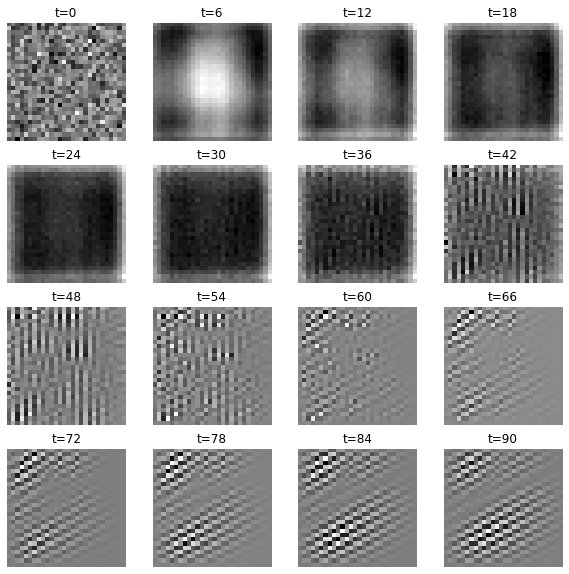

In [8]:
from matplotlib import pyplot as plt
# make a grid of 16 images
plt.figure(figsize=(20, 20))
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

n_plots = 16

for i in range(4):
    for j in range(4):
        index = time_steps // n_plots * (i * 4 + j)
        axs[i, j].imshow(samples[0, index, :, :, 0], cmap="gray")
        axs[i, j].set_title(f"t={index}")
        axs[i, j].axis("off")


In [8]:
from flow_matching_jax.data.get_dataset import get_dataset_online

In [7]:
config = config_module.get_config()

In [9]:
it, eval = get_dataset_online(None, config)

I0000 00:00:1743000611.536024  124455 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21739 MB memory:  -> device: 0, name: NVIDIA GH200 480GB, pci bus id: 0000:dd:00.0, compute capability: 9.0


In [17]:
import numpy as np

for i in it:
    s = i["samples"][0, 0, :]
    np.save("sample.npy", s)
    break

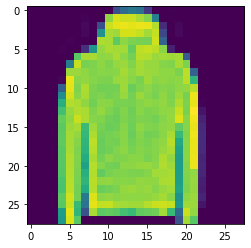

In [19]:
import matplotlib.pyplot as plt
plt.imshow(s)